In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import os  
import seaborn as sns

In [76]:
data=pd.read_csv("Downloads\WHO-COVID-19-global-data.csv")

In [77]:
data

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,03-01-2020,AF,Afghanistan,EMRO,0,0,0,0
1,04-01-2020,AF,Afghanistan,EMRO,0,0,0,0
2,05-01-2020,AF,Afghanistan,EMRO,0,0,0,0
3,06-01-2020,AF,Afghanistan,EMRO,0,0,0,0
4,07-01-2020,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
178693,21-01-2022,ZW,Zimbabwe,AFRO,808,227695,14,5280
178694,22-01-2022,ZW,Zimbabwe,AFRO,266,227961,8,5288
178695,23-01-2022,ZW,Zimbabwe,AFRO,218,228179,4,5292
178696,24-01-2022,ZW,Zimbabwe,AFRO,75,228254,2,5294


In [78]:
data.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,1.786980e+05,1.786980e+05,178698.000000,178698.000000
mean,1.974262e+03,4.603076e+05,31.340216,9991.535854
std,1.417600e+04,2.547220e+06,164.592933,47888.783965
min,-3.295200e+04,0.000000e+00,-92.000000,0.000000
25%,0.000000e+00,1.050000e+02,0.000000,1.000000
50%,1.900000e+01,7.539000e+03,0.000000,112.000000
75%,4.570000e+02,1.242442e+05,6.000000,2116.000000
max,1.336733e+06,7.015360e+07,8786.000000,860113.000000


selecting only specific featurs from our dataset

In [79]:
df=data[['Date_reported','Country','New_cases','New_deaths','Cumulative_deaths']]


In [80]:
df

,Date_reported,Country,New_cases,New_deaths,Cumulative_deaths
0,03-01-2020,Afghanistan,0,0,0
1,04-01-2020,Afghanistan,0,0,0
2,05-01-2020,Afghanistan,0,0,0
3,06-01-2020,Afghanistan,0,0,0
4,07-01-2020,Afghanistan,0,0,0
...,...,...,...,...,...
178693,21-01-2022,Zimbabwe,808,14,5280
178694,22-01-2022,Zimbabwe,266,8,5288
178695,23-01-2022,Zimbabwe,218,4,5292
178696,24-01-2022,Zimbabwe,75,2,5294


In [81]:
df.describe()

,New_cases,New_deaths,Cumulative_deaths
count,1.786980e+05,178698.000000,178698.000000
mean,1.974262e+03,31.340216,9991.535854
std,1.417600e+04,164.592933,47888.783965
min,-3.295200e+04,-92.000000,0.000000
25%,0.000000e+00,0.000000,1.000000
50%,1.900000e+01,0.000000,112.000000
75%,4.570000e+02,6.000000,2116.000000
max,1.336733e+06,8786.000000,860113.000000


making a new dataframe named "india_df" for analysing cases in india

In [82]:
india_df=df[df['Country']== 'India']

In [83]:
india_df

,Date_reported,Country,New_cases,New_deaths,Cumulative_deaths
72384,03-01-2020,India,0,0,0
72385,04-01-2020,India,0,0,0
72386,05-01-2020,India,0,0,0
72387,06-01-2020,India,0,0,0
72388,07-01-2020,India,0,0,0
...,...,...,...,...,...
73133,21-01-2022,India,347254,703,488396
73134,22-01-2022,India,337704,488,488884
73135,23-01-2022,India,333533,525,489409
73136,24-01-2022,India,306064,439,489848


In [84]:
visualizing the overall cases in a single plot

SyntaxError: invalid syntax (<ipython-input-84-2cb90be8dc65>, line 1)

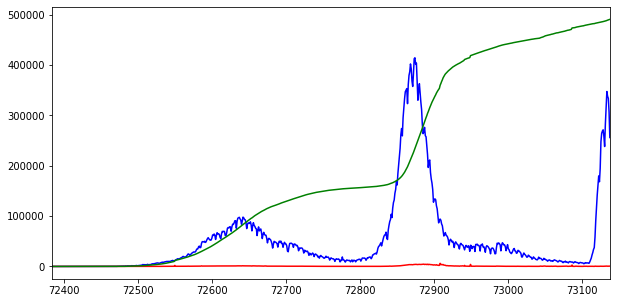

In [85]:

india_df.New_cases.plot(figsize=(10, 5),color='b')
india_df.New_deaths.plot(figsize=(10, 5),color='r')
india_df.Cumulative_deaths.plot(figsize=(10, 5),color='g')


splitting the data in train and test for fitting a linear regression model

In [86]:
# Define explanatory variables
india_df['S_3'] = india_df['New_cases'].rolling(window=3).mean()
india_df['S_9'] = india_df['New_cases'].rolling(window=9).mean()
india_df['estimated_cases'] = india_df['New_cases'].shift(-1)

india_df = india_df.dropna()
X = india_df[['S_3', 'S_9']]

# Define dependent variable
y = india_df['estimated_cases']
t = .4
t = int(t*len(india_df))

# Train dataset
X_train = X[:t]
y_train = y[:t]

# Test dataset
X_test = X[t:]
y_test = y[t:]

C:\Users\MANIDEEP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\MANIDEEP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\MANIDEEP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

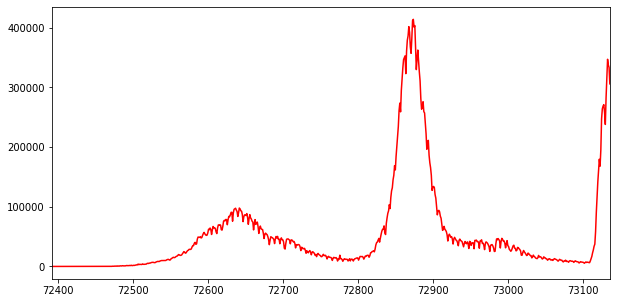

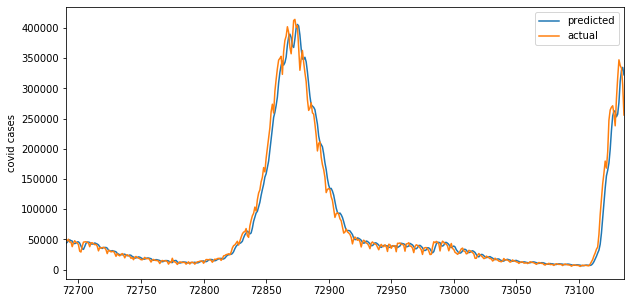

In [87]:
india_df.New_cases.plot(figsize=(10, 5),color='r')
# Predicting the prices
linear = LinearRegression().fit(X_train, y_train)
predicted= linear.predict(X_test)
predicted = pd.DataFrame(
    predicted, index=y_test.index, columns=['New_cases'])
predicted.plot(figsize=(10, 5))
y_test.plot()
plt.legend(['predicted', 'actual'])
plt.ylabel("covid cases")
plt.show()

In [88]:
# R square
r2_score = linear.score(X[t:], y[t:])*100
float("{0:.2f}".format(r2_score))

97.66

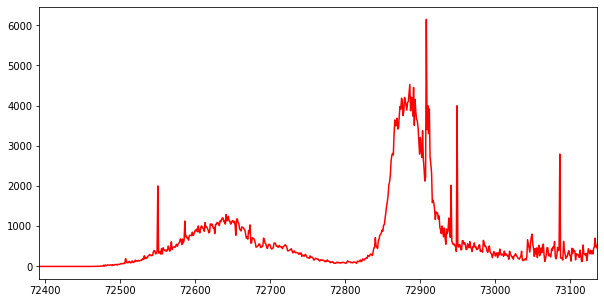

In [89]:
india_df.New_deaths.plot(figsize=(10, 5),color='r')

In [108]:
# Define explanatory variables
india_df['S_3'] = india_df['New_deaths'].rolling(window=3).mean()
india_df['S_9'] = india_df['New_deaths'].rolling(window=9).mean()
india_df['estimated_deaths'] = india_df['New_deaths'].shift(-1)

india_df = india_df.dropna()
X = india_df[['S_3', 'S_9']]

# Define dependent variable
y = india_df['estimated_deaths']
t = .20
t = int(t*len(india_df))

# Train dataset
X_train = X[:t]
y_train = y[:t]

# Test dataset
X_test = X[t:]
y_test = y[t:]

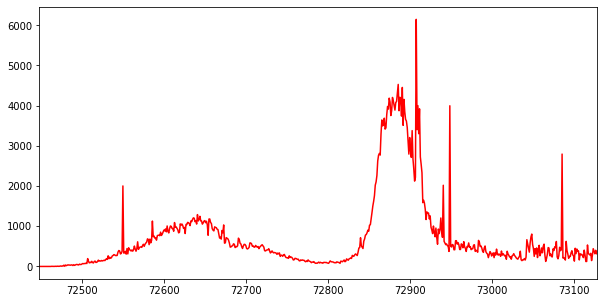

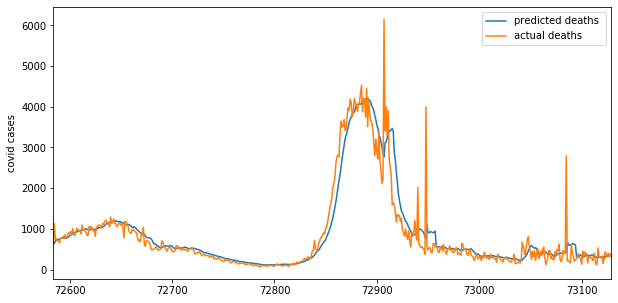

In [109]:
india_df.New_deaths.plot(figsize=(10, 5),color='r')
# Predicting the prices
linear = LinearRegression().fit(X_train, y_train)
predicted= linear.predict(X_test)
predicted = pd.DataFrame(
    predicted, index=y_test.index, columns=['New_deaths'])
predicted.plot(figsize=(10, 5))
y_test.plot()
plt.legend(['predicted deaths ', 'actual deaths'])
plt.ylabel("covid cases")
plt.show()

In [110]:
#sns.pairplot(X, diag_kind='kde')
r2_score = linear.score(X[t:], y[t:])*100
float("{0:.2f}".format(r2_score))

87.07